In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import scipy.io.wavfile
from scipy import fftpack
import pydub
from pydub.playback import play
import math

In [19]:
def dct1D(vector):
    N = len(vector)
    X = np.zeros(N)
    Ak = math.sqrt(2.0/N)
    for k in range(N):
        print(k , " | ", N, end="\r")
        
        if k == 0:
            Ck = math.sqrt(1/2)
        else:
            Ck = 1
            
        somatorio = 0
        for n in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            somatorio += vector[n] * math.cos((q/twoN) + (w/twoN))
            
            #sum += vector[n] * math.cos(((2*math.pi*k*n)/2*N)+((k*math.pi)/2*N))
        X[k] = Ak * Ck * somatorio

    return X

In [20]:
# CalculaIDCT

In [21]:
def idct1D(X):

    N = len(X)
    x = np.zeros(N)

    Ak = math.sqrt(2.0/N)
    
    for n in range(N):
        print(n , " | ", N)
        somatorio = 0
        for k in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            if k == 0:
                Ck = math.sqrt(1.0/2.0)
            else:
                Ck = 1.0
            
            somatorio += Ck * X[k] * math.cos((q/twoN)+(w/twoN))
            
            
        x[n] = Ak * somatorio

    return x

# Função para plotagem do gráfico com a DCT Filtrada

In [22]:
def plotaDCTs(dct, dctFiltrada):
    plt.figure('Domínio da Frequência')
    plt.subplot(211)
    plt.plot(dct, linewidth=0.1, alpha=1.0, color='blue')
    plt.ylabel('Frequencia')
    plt.subplot(212)
    plt.plot(dctFiltrada, linewidth=0.1, alpha=1.0, color='blue')
    plt.ylabel('Frequencia')
    plt.show()

In [23]:
def desenhaGrafico(nomeArquivo, data):
    plt.figure(nomeArquivo)
    plt.title(nomeArquivo)
    plt.plot(data, linewidth=0.1, alpha=1, color='red')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequencia')
    plt.show()

# Testes com DCT

In [24]:
x_slide = []

X_slide = [10, 5, 8.5, 2, 1, 1.5, 0, 0.1]

x_slide = idct1D(X_slide)
x_slide_pack = fftpack.idct(X_slide, norm='ortho')

print("M: ", x_slide)
print("C: ", x_slide_pack)

0  |  8
1  |  8
2  |  8
3  |  8
4  |  8
5  |  8
6  |  8
7  |  8
M:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
C:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]


In [25]:
X_DCT = dct1D(x_slide)
X_DCT

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.44328993e-15,  1.00000000e-01])

In [26]:
X_DCT_pack = fftpack.dct(x_slide, norm="ortho")
X_DCT_pack

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.77635684e-15,  1.00000000e-01])

In [27]:
X_DCT == X_DCT_pack

array([False, False,  True, False, False, False, False, False])

# DCTAudio

/home/lucasnn/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


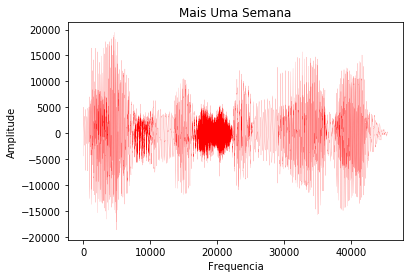

In [28]:
rate, audioData = scipy.io.wavfile.read("MaisUmaSemana.wav")
desenhaGrafico("Mais Uma Semana", audioData)

In [ ]:
DCT = dct1D(audioData)

#DCT = fftpack.dct(audioData, norm = 'ortho') #Calcula a Transformada Discreta

In [78]:
#print (DCT)
dctFiltrada = DCT.copy()
# print (dctFiltrada)

In [79]:
listaComDCT = dctFiltrada.tolist() #Cria uma lista com os valores resultantes da Transformada Discreta
#print(listaComDCT)
Indices = []

#Percorre todo o array e troca os valores pelo seu módulo
for i in range(0, len(listaComDCT)):
    listaComDCT[i] = abs(listaComDCT[i])
    aux = listaComDCT.copy()

#print(listaComDCT)

In [80]:
numero_de_frequencias_desejadas = int(input("Digite o numero de frequencias desejadas: "))

Digite o numero de frequencias desejadas: 50


In [81]:
#Adiciona na lista os n índices de maior valor, com n = numero de amostras
for i in range(0,numero_de_frequencias_desejadas):
    Indices.append(listaComDCT.index(max(aux)))
    indiceAux = aux.index(max(aux))
    aux.pop(indiceAux)

    # dctFiltrada = DCT.copy()

print(Indices)

[1363, 1357, 1359, 1347, 1365, 1362, 455, 447, 454, 1373, 1375, 1349, 383, 1393, 1364, 1355, 1432, 379, 1330, 1320, 382, 1367, 462, 452, 460, 591, 459, 1326, 1377, 1322, 1332, 703, 1338, 393, 1398, 1336, 1104, 1372, 340, 596, 1380, 1340, 1321, 363, 1383, 588, 881, 1317, 1436, 1073]


In [84]:
#Preserva os DCT's de tamanho igual aos da lista de IndiceMaximo verificando se eles estão na lista e zera os demais
for i in range(0, len(dctFiltrada)):
    if i not in Indices:
        dctFiltrada[i] = 0

dctFiltrada = np.asarray(dctFiltrada)

AudioTransformado = fftpack.idct(DCT, norm = 'ortho')
AudioTransformado = AudioTransformado.astype("int16")
scipy.io.wavfile.write("audioTransformado.wav", rate, AudioTransformado)

AudioTransformadoImportantes = fftpack.idct(dctFiltrada, norm = 'ortho')
AudioTransformadoImportantes = AudioTransformadoImportantes.astype("int16")
scipy.io.wavfile.write("AudioTransformadoImportantes.wav", rate, AudioTransformadoImportantes)

plotaDCTs(DCT, dctFiltrada)

NameError: name 'Indices' is not defined

In [85]:
del(Indices)

NameError: name 'Indices' is not defined